In [51]:
import pickle

In [104]:
NOISE_LEVEL = 0.1
SAMPLE = 4
NET = "from_scratch_"
#NET = ""

with open(f"pickles/{NET}{SAMPLE}_variance_{NOISE_LEVEL}.pickle", "rb") as f:
    variances = pickle.load(f)
variances

[array([0.01021457, 0.01020748, 0.01106748, ..., 0.00966011, 0.01023808,
        0.01007685], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.8098253e-05,
        3.2222535e-05, 4.1035360e-05], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 8.8311672e-06, ..., 1.1504441e-03,
        7.5168331e-04, 0.0000000e+00], dtype=float32),
 array([0.0001804 , 0.00018467, 0.00028889, ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00046161], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00022133], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00022133], dtype=float32)]

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [106]:
len(variances)

7

In [107]:
max = variances[0].max()
max

0.012084701

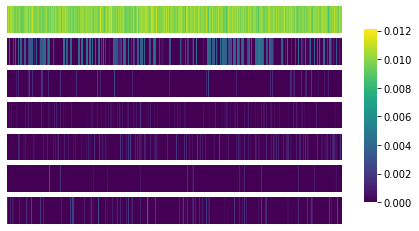

In [108]:
fig, axs = plt.subplots(nrows=7, ncols=1)
cbar_ax = fig.add_axes([.95, .2, .03, .6])
for i, var in enumerate(variances):
    #var = [x for x in var if x!=0]
    df = pd.DataFrame({"variance": var},
                      index=range(len(var)))
    sns.heatmap(df.T, annot=False,  cmap='viridis', ax=axs[i], vmin=0, vmax=max,
                cbar_ax=None if i else cbar_ax,
                cbar=i == 0)
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
    

In [88]:
for var in variances:
    print(var.max())

0.3045844
3.273219
18.551373
24.226192
2.6679072
0.8176025
0.79984504


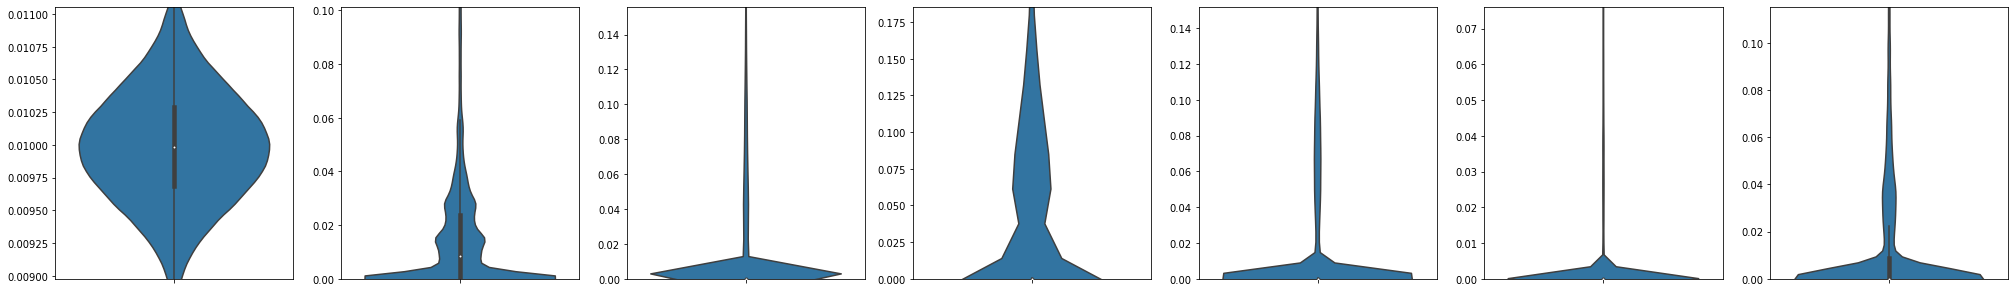

In [44]:
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(35, 5))
for i, var in enumerate(variances):
    sns.violinplot(y=var, ax=axs[i])
    m = np.quantile(var, 0.99)
    l = np.quantile(var, .01)
    axs[i].set(ylim=(l, m))